In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

# **DATA CLEANING AND WRANGLING**

In [ ]:
df = pd.read_csv("/content/_Roads_All_Variables_new.csv")

In [ ]:
df

FULLNAME Zoning  LST_weighted  CAN_weighted  ALB_weighted  \
0                Myrick St    Res     98.771360      0.136277      0.127562   
1                Holton St   None     95.182791      0.258872      0.130516   
2                Market St   Exmp    101.341348      0.000000      0.115370   
3                      NaN    Res    100.282753      0.082111      0.126748   
4                Mackin St    Res    101.347439      0.022142      0.125663   
...                    ...    ...           ...           ...           ...   
24713               23Ne 2   None    101.700000      0.000000      0.112000   
24714                  NaN   None     92.249495      0.000000      0.111001   
24715                  NaN   None     91.559575      0.297713      0.134816   
24716  Storrow Memorial Dr   None     88.930929      0.247501      0.117532   
24717                  NaN   None     92.033085      0.000000      0.112583   

       ISA_weighted  TotalPop     PopDen    ByAuto  ByPubTrans    ByBike  \
0          0.614148    4185.0  6038.7188  0.607328    0.250431  0.061207   
1          0.615610    4185.0  6038.7188  0.607328    0.250431  0.061207   
2          0.926138    4185.0  6038.7188  0.607328    0.250431  0.061207   
3          0.642052    4185.0  6038.7188  0.607328    0.250431  0.061207   
4          0.717437    4185.0  6038.7188  0.607328    0.250431  0.061207   
...             ...       ...        ...       ...         ...       ...   
24713      0.997000       NaN        NaN       NaN         NaN       NaN   
24714      0.757448       NaN        NaN       NaN         NaN       NaN   
24715      0.638276       NaN        NaN       NaN         NaN       NaN   
24716      0.943646       NaN        NaN       NaN         NaN       NaN   
24717      0.714108       NaN        NaN       NaN         NaN       NaN   

        ByWalk  TotalHouseUnits  VacantUnitPer  MedYrBuiltRaw  
0      0.06681           1697.0       0.117266         1942.0  
1      0.06681           1697.0       0.117266         1942.0  
2      0.06681           1697.0       0.117266         1942.0  
3      0.06681           1697.0       0.117266         1942.0  
4      0.06681           1697.0       0.117266         1942.0  
...        ...              ...            ...            ...  
24713      NaN              NaN            NaN            NaN  
24714      NaN              NaN            NaN            NaN  
24715      NaN              NaN            NaN            NaN  
24716      NaN              NaN            NaN            NaN  
24717      NaN              NaN            NaN            NaN  

[24718 rows x 15 columns]

In [ ]:
df = df.drop(columns = ["FULLNAME"])

In [ ]:
df = df.dropna()

In [ ]:
df['Zoning'] = df['Zoning'].astype('category').cat.codes
df.head()
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24129 entries, 0 to 24566
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Zoning           24129 non-null  int8   
 1   LST_weighted     24129 non-null  float64
 2   CAN_weighted     24129 non-null  float64
 3   ALB_weighted     24129 non-null  float64
 4   ISA_weighted     24129 non-null  float64
 5   TotalPop         24129 non-null  float64
 6   PopDen           24129 non-null  float64
 7   ByAuto           24129 non-null  float64
 8   ByPubTrans       24129 non-null  float64
 9   ByBike           24129 non-null  float64
 10  ByWalk           24129 non-null  float64
 11  TotalHouseUnits  24129 non-null  float64
 12  VacantUnitPer    24129 non-null  float64
 13  MedYrBuiltRaw    24129 non-null  float64
dtypes: float64(13), int8(1)
memory usage: 2.6 MB


<ipython-input-6-50a8fb93c71e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Zoning'] = df['Zoning'].astype('category').cat.codes


Zoning  LST_weighted  CAN_weighted  ALB_weighted  ISA_weighted  \
0           4     98.771360      0.136277      0.127562      0.614148   
1           3     95.182791      0.258872      0.130516      0.615610   
2           1    101.341348      0.000000      0.115370      0.926138   
3           4    100.282753      0.082111      0.126748      0.642052   
4           4    101.347439      0.022142      0.125663      0.717437   
...       ...           ...           ...           ...           ...   
24562       3     85.072107      0.505944      0.149429      0.191496   
24563       3     87.300000      0.420000      0.143000      0.832000   
24564       3     88.244846      0.505272      0.152614      0.505479   
24565       3     89.357754      0.434004      0.133500      0.495099   
24566       3     83.584781      0.657125      0.150175      0.568156   

       TotalPop       PopDen    ByAuto  ByPubTrans    ByBike   ByWalk  \
0        4185.0  6038.718800  0.607328    0.250431  0.061207  0.06681   
1        4185.0  6038.718800  0.607328    0.250431  0.061207  0.06681   
2        4185.0  6038.718800  0.607328    0.250431  0.061207  0.06681   
3        4185.0  6038.718800  0.607328    0.250431  0.061207  0.06681   
4        4185.0  6038.718800  0.607328    0.250431  0.061207  0.06681   
...         ...          ...       ...         ...       ...      ...   
24562      53.0   195.187082  0.884615    0.000000  0.000000  0.00000   
24563      53.0   195.187082  0.884615    0.000000  0.000000  0.00000   
24564      53.0   195.187082  0.884615    0.000000  0.000000  0.00000   
24565      53.0   195.187082  0.884615    0.000000  0.000000  0.00000   
24566      53.0   195.187082  0.884615    0.000000  0.000000  0.00000   

       TotalHouseUnits  VacantUnitPer  MedYrBuiltRaw  
0               1697.0       0.117266         1942.0  
1               1697.0       0.117266         1942.0  
2               1697.0       0.117266         1942.0  
3               1697.0       0.117266         1942.0  
4               1697.0       0.117266         1942.0  
...                ...            ...            ...  
24562             40.0       0.250000         1973.0  
24563             40.0       0.250000         1973.0  
24564             40.0       0.250000         1973.0  
24565             40.0       0.250000         1973.0  
24566             40.0       0.250000         1973.0  

[24129 rows x 14 columns]

## Random Forest for Feature Importance

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import r2_score,mean_squared_error
import pandas as pd

# Assuming df is your DataFrame

X = df.drop(columns=['LST_weighted'])
y = df['LST_weighted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

results = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

importances = results.importances_mean

feature_importance_dict = dict(zip(X.columns, importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)
feature_importance_df = pd.DataFrame(sorted_feature_importance, columns=['Feature', 'Importance'])

# Predict on test set
y_pred = rf.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate adjusted R^2 score
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Print the adjusted R^2 score
print("Adjusted R^2 score:", adjusted_r2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)
print(feature_importance_df)


Adjusted R^2 score: 0.7949761547864428
Root Mean Squared Error (RMSE): 2.422972266937923
            Feature  Importance
0      CAN_weighted    0.422892
1      ISA_weighted    0.213010
2      ALB_weighted    0.084197
3        ByPubTrans    0.046282
4            PopDen    0.046129
5     VacantUnitPer    0.015916
6            Zoning    0.014348
7            ByWalk    0.012891
8            ByBike    0.009234
9          TotalPop    0.004585
10           ByAuto    0.004169
11  TotalHouseUnits    0.001657
12    MedYrBuiltRaw    0.001519


In [ ]:
import plotly.express as px

# Assuming you have feature_importance_df defined already

sorted_idx = feature_importance_df['Importance'].argsort()
fig = px.bar(feature_importance_df.iloc[sorted_idx],
             x='Importance',
             y='Feature',
             orientation='h',
             title='Feature Importance',
             labels={'Feature': 'Feature', 'Importance': 'Permutation Importance'},
             color_discrete_sequence=['plum'])

fig.update_layout(xaxis_title='Permutation Importance',
                  yaxis_title='Feature',
                  yaxis_categoryorder='total ascending')

fig.show()



# **PRELIMINARY VISUALIZATION FOR EXPLORATORY DATA ANALYSIS**


In [ ]:
import plotly.express as px

fig = px.scatter(df, x='PopDen', y=['ByAuto', 'ByPubTrans', 'ByBike', 'ByWalk'],
                 labels={'PopDen': 'Population Density', 'value': 'Proportion of Population'},
                 title='Population Density vs. Modes of Transportation',
                  color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(marker=dict(size=8, opacity=0.6))

fig.show()


The scatter plot above illustrates the relationship between population density and the proportion of the population using different modes of transportation (auto, public transport, bike, walk) in the given area. Each point represents a different road or location from the dataset.

## Land Surface Temperature (LST) Distribution by Zoning

In [ ]:
import pandas as pd
import plotly.express as px

df1 = pd.read_csv("/content/_Roads_All_Variables_new.csv")

filtered_df = df1.dropna(subset=['LST_weighted', 'Zoning'])
zoning_counts = filtered_df['Zoning'].value_counts()
zoning_to_plot = zoning_counts[zoning_counts > 1].index  # Only include Zoning categories with more than 1 data point
filtered_df = filtered_df[filtered_df['Zoning'].isin(zoning_to_plot)]

fig = px.histogram(filtered_df, x="LST_weighted", color="Zoning",
                   nbins=30, barmode='overlay',
                   category_orders={"Zoning": zoning_to_plot},
                   labels={'LST_weighted': 'Land Surface Temperature (LST)',
                           'count': 'Frequency'},
                   title='Land Surface Temperature Distribution by Zoning')
fig.update_layout(bargap=0.1)
fig.show()



The histogram above displays the distribution of Land Surface Temperature (LST) across different zoning types. Each color represents a different zoning category, illustrating the variability in LST within and across these zones.

## Vacant Housing Units Percentage by Zoning (Bar Chart)

In [ ]:
import plotly.express as px


vacant_units_by_zone = df1.groupby('Zoning')['VacantUnitPer'].mean().reset_index()

fig = px.bar(vacant_units_by_zone, x='Zoning', y='VacantUnitPer',
             title='Vacant Housing Units Percentage by Zoning',
             labels={'VacantUnitPer': 'Average Percentage of Vacant Units', 'Zoning': 'Zoning'},
             color='VacantUnitPer',
             color_continuous_scale='Burg')

fig.update_layout(xaxis={'categoryorder':'total descending'},
                  xaxis_title='Zoning',
                  yaxis_title='Average Percentage of Vacant Units',
                  xaxis_tickangle=-45)

fig.show()


The bar chart above shows the average percentage of vacant housing units across different zoning categories. This visualization helps in understanding how housing vacancy rates vary by zoning type, which can reflect different residential, commercial, or industrial uses of land.

 ## Zoning Distribution (Pie Chart)

In [ ]:
import plotly.express as px

# Assuming you have zoning_counts defined already

fig = px.pie(values=zoning_counts,
             names=zoning_counts.index,
             title='Distribution of Zoning Categories',
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=False)

fig.show()


This pie chart effectively communicates the distribution of zoning categories in the dataset, allowing viewers to quickly grasp the proportion of each category relative to the whole

# Environmental Factors by Zoning (Box Plots)

In [ ]:
import plotly.express as px

env_factors = ['LST_weighted', 'CAN_weighted', 'ALB_weighted', 'ISA_weighted']

for factor in env_factors:
    fig = px.box(df1, x='Zoning', y=factor,
                 labels={'value': 'Value', 'Zoning': 'Zoning'},
                 category_orders={'Zoning': sorted(df1['Zoning'].unique())},
                 color_discrete_sequence=px.colors.qualitative.Pastel)

    fig.update_layout(title=f'Distribution of {factor} by Zoning',
                      title_x=0.5,
                      xaxis_title='Zoning',
                      yaxis_title='Value',
                      xaxis_tickangle=45,
                      showlegend=False)

    fig.show()


These plots provide insights into how each environmental factor varies across zoning categories, aiding in understanding the relationship between environmental conditions and zoning designations.

# **ANALYSIS**

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd


X = df.drop(columns=['LST_weighted',])
y = df['LST_weighted']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(r2_score(y_test, y_pred))
r2=r2_score(y_test, y_pred)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Print the adjusted R^2 score
print("Adjusted R^2 score:", adjusted_r2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)
# Get feature names
feature_names = X.columns.tolist()

# Combine coefficients and feature names into a DataFrame
coef_df = pd.DataFrame({'Feature': ['(Intercept)'] + list(feature_names),
                        'Estimate': [lr.intercept_] + list(lr.coef_)})

coef_df

0.6904966959764135
Adjusted R^2 score: 0.6896605482307139
Root Mean Squared Error (RMSE): 2.98101904306742


Feature   Estimate
0       (Intercept)  98.705325
1            Zoning  -0.171807
2      CAN_weighted  -2.265558
3      ALB_weighted  -0.362126
4      ISA_weighted   1.999650
5          TotalPop  -0.097137
6            PopDen   0.301676
7            ByAuto   4.346421
8        ByPubTrans   3.136893
9            ByBike   0.859930
10           ByWalk   3.714971
11  TotalHouseUnits  -0.066122
12    VacantUnitPer   0.023259
13    MedYrBuiltRaw   0.167347

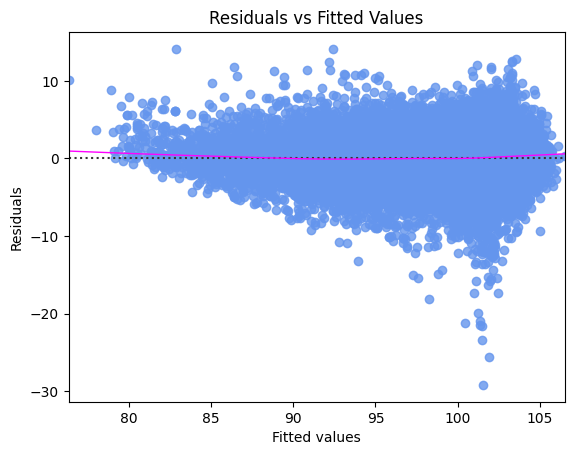

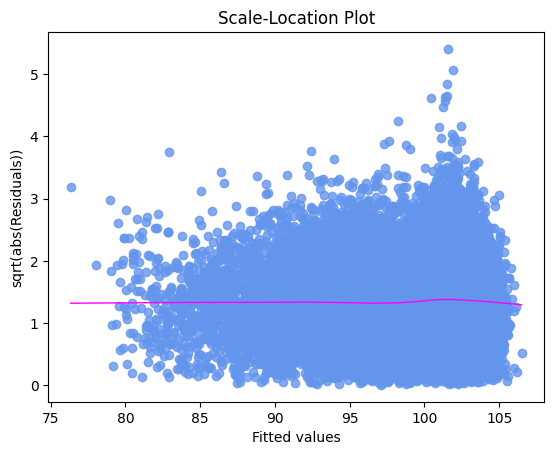

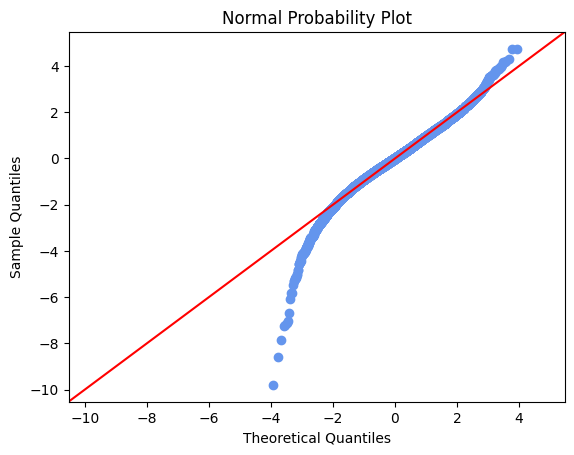

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, acorr_breusch_godfrey
from statsmodels.graphics.gofplots import ProbPlot
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
# Fit the linear regression model
X = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X).fit()

# Linearity: Residual plots
sns.residplot(data=df,x=model.fittedvalues, y=model.resid,scatter_kws={'color': 'cornflowerblue'}, lowess=True, line_kws={'color': 'fuchsia', 'lw': 1})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Homoscedasticity: Plot of residuals vs fitted values
# Calculate the square root of the absolute values of residuals
sqrt_abs_residuals = np.sqrt(np.abs(model.resid))
# Create scatter plot with lowess line
sns.regplot(x=model.fittedvalues, y=sqrt_abs_residuals, scatter_kws={'color': 'cornflowerblue'}, lowess=True, line_kws={'color': 'fuchsia', 'lw': 1})
plt.xlabel('Fitted values')
plt.ylabel('sqrt(abs(Residuals))')
plt.title('Scale-Location Plot')
plt.show()

# Normality of residuals: Shapiro-Wilk test
probplot = ProbPlot(model.resid, fit=True)
probplot.qqplot(line='45', markerfacecolor='cornflowerblue',markeredgecolor='cornflowerblue')
plt.title('Normal Probability Plot')
plt.show()



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro

# 1. Check for multicollinearity (VIF)
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

# Calculate Breusch-Pagan test for homoscedasticity
bp_test = het_breuschpagan(model.resid, X)
print("Breusch-Pagan test p-value:", bp_test[1])

# Normality of residuals: Shapiro-Wilk test
shapiro_test = shapiro(model.resid)
print("Shapiro-Wilk test p-value:", shapiro_test.pvalue)

# Independence: You can check autocorrelation in residuals using Durbin-Watson test
durbin_watson = sm.stats.durbin_watson(model.resid)
print("Durbin-Watson:", durbin_watson)
# If the value is around 2, there is no significant autocorrelation.


            Feature          VIF
0             const  1810.945699
1            Zoning     1.092673
2      CAN_weighted     1.795347
3      ALB_weighted     1.489996
4      ISA_weighted     2.234304
5          TotalPop     3.098010
6            PopDen     1.745710
7            ByAuto    73.048141
8        ByPubTrans    24.455831
9            ByBike     2.022213
10           ByWalk    64.071317
11  TotalHouseUnits     3.285002
12    VacantUnitPer     1.560388
13    MedYrBuiltRaw     1.171163
Breusch-Pagan test p-value: 2.70098216063463e-295
Shapiro-Wilk test p-value: 2.802596928649634e-45
Durbin-Watson: 1.5814751248493701


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


            Feature          VIF
0             const  1810.945699
1            Zoning     1.092673
2      CAN_weighted     1.795347
3      ALB_weighted     1.489996
4      ISA_weighted     2.234304
5          TotalPop     3.098010
6            PopDen     1.745710
7            ByAuto    73.048141
8        ByPubTrans    24.455831
9            ByBike     2.022213
10           ByWalk    64.071317
11  TotalHouseUnits     3.285002
12    VacantUnitPer     1.560388
13    MedYrBuiltRaw     1.171163


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd


X = df.drop(columns=['LST_weighted','ByAuto'])
y = df['LST_weighted']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(r2_score(y_test, y_pred))
r2=r2_score(y_test, y_pred)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Print the adjusted R^2 score
print("Adjusted R^2 score:", adjusted_r2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)
# Get feature names
feature_names = X.columns.tolist()

# Combine coefficients and feature names into a DataFrame
coef_df = pd.DataFrame({'Feature': ['(Intercept)'] + list(feature_names),
                        'Estimate': [lr.intercept_] + list(lr.coef_)})

coef_df

0.6819417555725574
Adjusted R^2 score: 0.6811487576641575
Root Mean Squared Error (RMSE): 3.021937196094367


Feature   Estimate
0       (Intercept)  98.703555
1            Zoning  -0.165227
2      CAN_weighted  -2.354542
3      ALB_weighted  -0.355983
4      ISA_weighted   2.044553
5          TotalPop   0.102947
6            PopDen   0.294892
7        ByPubTrans   0.705017
8            ByBike   0.369380
9            ByWalk  -0.279567
10  TotalHouseUnits  -0.309566
11    VacantUnitPer   0.000817
12    MedYrBuiltRaw   0.174021

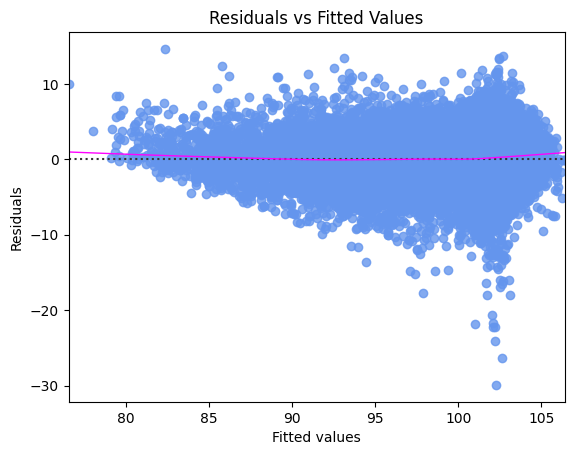

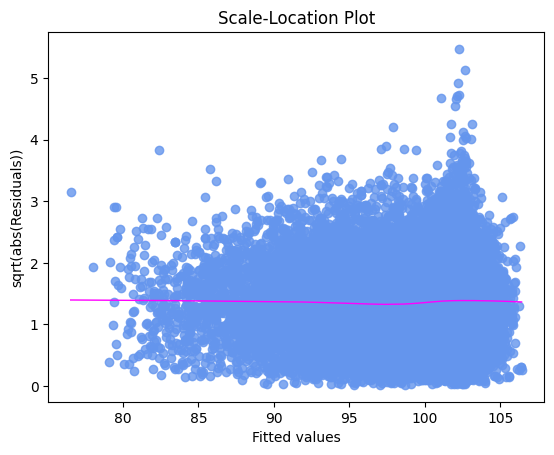

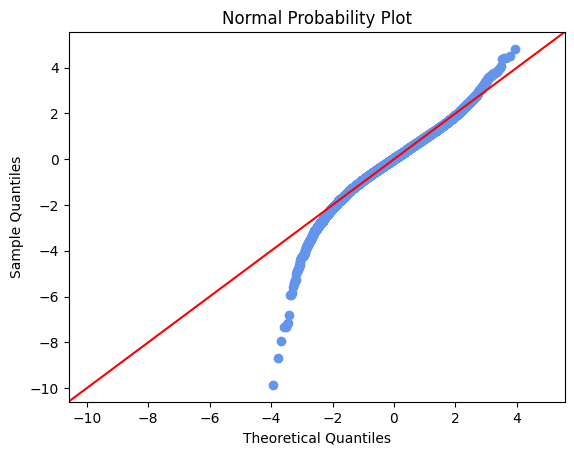

Breusch-Pagan test p-value: 1.1379290341877e-311
Shapiro-Wilk test p-value: 0.0
Durbin-Watson: 1.5405957414199094


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, acorr_breusch_godfrey
from statsmodels.graphics.gofplots import ProbPlot
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Fit the linear regression model
X = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X).fit()

# Linearity: Residual plots
sns.residplot(data=df,x=model.fittedvalues, y=model.resid,scatter_kws={'color': 'cornflowerblue'}, lowess=True, line_kws={'color': 'fuchsia', 'lw': 1})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Homoscedasticity: Plot of residuals vs fitted values
# Calculate the square root of the absolute values of residuals
sqrt_abs_residuals = np.sqrt(np.abs(model.resid))
# Create scatter plot with lowess line
sns.regplot(x=model.fittedvalues, y=sqrt_abs_residuals, scatter_kws={'color': 'cornflowerblue'}, lowess=True, line_kws={'color': 'fuchsia', 'lw': 1})
plt.xlabel('Fitted values')
plt.ylabel('sqrt(abs(Residuals))')
plt.title('Scale-Location Plot')
plt.show()

# Normality of residuals: Shapiro-Wilk test
probplot = ProbPlot(model.resid, fit=True)
probplot.qqplot(line='45', markerfacecolor='cornflowerblue',markeredgecolor='cornflowerblue')
plt.title('Normal Probability Plot')
plt.show()



# Calculate Breusch-Pagan test for homoscedasticity
bp_test = het_breuschpagan(model.resid, X)
print("Breusch-Pagan test p-value:", bp_test[1])

# Normality of residuals: Shapiro-Wilk test
shapiro_test = shapiro(model.resid)
print("Shapiro-Wilk test p-value:", shapiro_test.pvalue)

# Independence: You can check autocorrelation in residuals using Durbin-Watson test
durbin_watson = sm.stats.durbin_watson(model.resid)
print("Durbin-Watson:", durbin_watson)
# If the value is around 2, there is no significant autocorrelation.


In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, acorr_breusch_godfrey
from statsmodels.graphics.gofplots import ProbPlot
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Perform Box-Cox transformation
transformed_data, lambda_value = stats.boxcox(y)

print("Transformed data:", transformed_data)
print("Lambda value:", lambda_value)
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, transformed_data, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(r2_score(y_test, y_pred))
r2=r2_score(y_test, y_pred)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Print the adjusted R^2 score
print("Adjusted R^2 score:", adjusted_r2)

# Get feature names
feature_names = X.columns.tolist()

# Combine coefficients and feature names into a DataFrame
coef_df = pd.DataFrame({'Feature': ['(Intercept)'] + list(feature_names),
                        'Estimate': [lr.intercept_] + list(lr.coef_)})

coef_df
X = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(transformed_data, X).fit()
# Calculate Breusch-Pagan test for homoscedasticity
bp_test = het_breuschpagan(model.resid, X)
print("Breusch-Pagan test p-value:", bp_test[1])

# Normality of residuals: Shapiro-Wilk test
shapiro_test = shapiro(model.resid)
print("Shapiro-Wilk test p-value:", shapiro_test.pvalue)

# Independence: You can check autocorrelation in residuals using Durbin-Watson test
durbin_watson = sm.stats.durbin_watson(model.resid)
print("Durbin-Watson:", durbin_watson)
# If the value is around 2, there is no significant autocorrelation

Transformed data: [6.77180049e+08 5.67651117e+08 7.65396179e+08 ... 3.95717428e+08
 4.20080965e+08 3.05532732e+08]
Lambda value: 4.767285348642906
0.6294931480682053
Adjusted R^2 score: 0.628723663432833
Breusch-Pagan test p-value: 0.0
Shapiro-Wilk test p-value: 2.787182645542061e-42
Durbin-Watson: 1.5180405686141987


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



In [ ]:

from scipy.stats import boxcox

# Perform Box-Cox transformation on the target variable y
y_transformed, lambda_value = stats.boxcox(y)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_transformed, test_size=0.2, random_state=42)

# Train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]
p = X_test.shape[1]

# Calculate adjusted R^2 score
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Print the adjusted R^2 score
print("Adjusted R^2 score:", adjusted_r2)

# Get feature names
feature_names = X.columns.tolist()

# Combine coefficients and feature names into a DataFrame
coef_df = pd.DataFrame({'Feature': ['(Intercept)'] + list(feature_names),
                        'Estimate': [lr.intercept_] + list(lr.coef_)})

# Print coefficients
print(coef_df)


Adjusted R^2 score: 0.628723663432833
          Feature      Estimate
0     (Intercept)  6.926981e+08
1           const  0.000000e+00
2          Zoning -9.505279e+06
3    CAN_weighted -6.612672e+07
4    ALB_weighted -1.425608e+07
5    ISA_weighted  6.412408e+07
6          PopDen  8.368809e+06
7      ByPubTrans  2.079653e+07
8          ByBike  1.081159e+07
9          ByWalk -7.250304e+06
10  VacantUnitPer -4.547400e+06


## SVR

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.svm import SVR
import numpy as np
X = df.drop(columns=['LST_weighted','ByAuto'])
y = df['LST_weighted']
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Predict
y_pred = svr.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Print the adjusted R^2 score
print("Adjusted R^2 score:", adjusted_r2)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Retrieve support vectors' dual coefficients
dual_coefs = svr.dual_coef_

# Calculate coefficients for features
coefficients = np.dot(dual_coefs, svr.support_vectors_)

# Get feature names after scaling
feature_names = scaler.get_feature_names_out()

# Print coefficients for each feature along with feature names
print("Coefficients for features:")
for i, (feat_name, coef) in enumerate(zip(feature_names, coefficients[0])):
    print(f"Feature {feat_name}: {coef}")


Adjusted R^2 score: 0.7709046561496091
Root Mean Squared Error (RMSE): 2.5615303674693553
Coefficients for features:
Feature Zoning: -8.251284379396111
Feature CAN_weighted: -367.36215794309965
Feature ALB_weighted: -67.32960937409754
Feature ISA_weighted: 267.7388336924359
Feature TotalPop: 20.88584571039005
Feature PopDen: 134.12472061910253
Feature ByPubTrans: 218.85952818957892
Feature ByBike: 72.17761189750641
Feature ByWalk: 47.289397690717536
Feature TotalHouseUnits: 18.66705020565841
Feature VacantUnitPer: 39.79467248804223
Feature MedYrBuiltRaw: -60.148782702556176


## Gradient Boosting Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
# Assuming df is your DataFrame

X = df.drop(columns=['LST_weighted','ByAuto'])
y = df['LST_weighted']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)
print(r2_score(y_test,y_pred))
r2=r2_score(y_test, y_pred)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Print the adjusted R^2 score
print("Adjusted R^2 score:", adjusted_r2)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Feature Importance
feature_importance = gbr.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
print(feature_importance_df)


# Sort feature importances in descending order
sorted_idx = feature_importance.argsort()[::-1]
sorted_feature_importance = feature_importance[sorted_idx]
sorted_features = X.columns[sorted_idx]


0.771620419197308
Adjusted R^2 score: 0.7710510123887411
Root Mean Squared Error (RMSE): 2.5607120272995703
            Feature  Importance
0            Zoning    0.006559
1      CAN_weighted    0.526763
2      ALB_weighted    0.057685
3      ISA_weighted    0.246200
4          TotalPop    0.007078
5            PopDen    0.052600
6        ByPubTrans    0.040947
7            ByBike    0.011657
8            ByWalk    0.024261
9   TotalHouseUnits    0.006025
10    VacantUnitPer    0.017881
11    MedYrBuiltRaw    0.002345


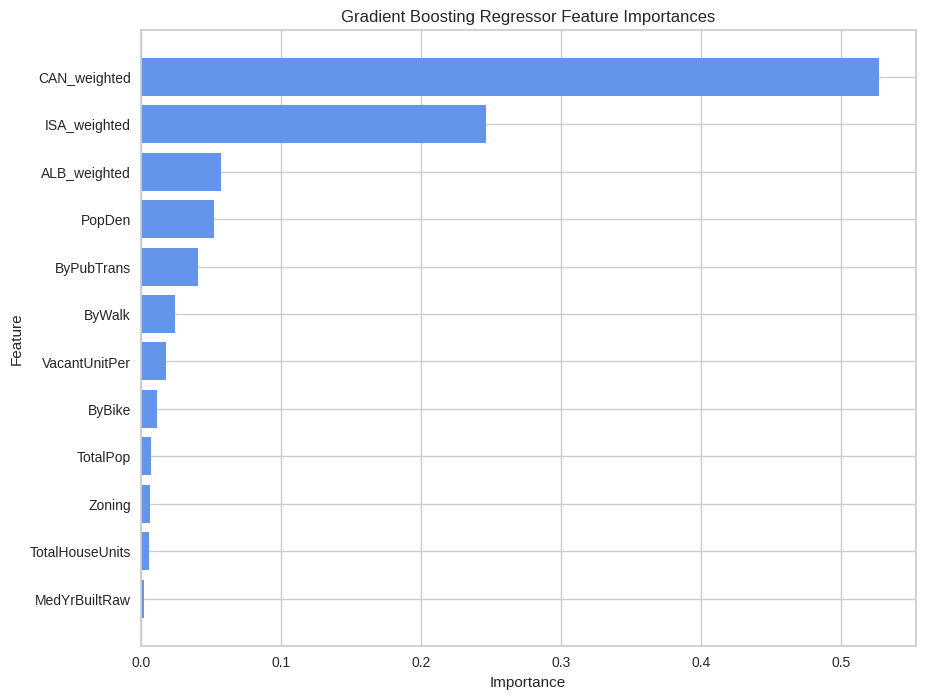

In [ ]:
import matplotlib.pyplot as plt

# Create a DataFrame with sorted feature importances
sorted_feature_importance_df = pd.DataFrame({'Feature': sorted_features, 'Importance': sorted_feature_importance})

# Plotting with Matplotlib
plt.figure(figsize=(10, 8))
plt.barh(sorted_feature_importance_df['Feature'], sorted_feature_importance_df['Importance'], color='cornflowerblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Regressor Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to display highest importance at the top
plt.show()


